In [1]:
library(Seurat)
seurat = readRDS('rhesus_seurat_integrated.RDS')

Warning message:
"package 'Seurat' was built under R version 4.1.3"
Attaching SeuratObject

Attaching sp



In [4]:
library(stringr)
metadata = read.table('monkey_hash_key.csv', header = TRUE, stringsAsFactors = FALSE, sep = ',')
seurat$hash_num = sapply(seurat$hash, function(x) str_split(x, fixed('.'))[[1]][1])
seurat$hash_num = substring(seurat$hash_num, 4, 5)
seurat$hash_id = paste0(seurat$letter, seurat$hash_num)
       seurat@meta.data$Fraction = ifelse(seurat@meta.data$orig %in% c('AB1', 'AB2', 'AC1', "AC2"), 'Pn3+', 'Pn3-')                  
metadata$hash_id = paste0(metadata$Letter, metadata$HTONum)
ind = match(seurat$hash_id, metadata$hash_id)
                         
seurat@meta.data[,c('Monkey', 'Group', 'IgG', 'OPA')] = metadata[ind, c('Monkey', 'Group', 'IgG', 'OPA')]

Warning message in FindVariableFeatures.Assay(object = assay.data, selection.method = selection.method, :
"selection.method set to 'vst' but count slot is empty; will use data slot instead"
Warning message in eval(predvars, data, env):
"NaNs produced"
Warning message in hvf.info$variance.expected[not.const] <- 10^fit$fitted:
"number of items to replace is not a multiple of replacement length"
Regressing out nFeature_RNA

Centering and scaling data matrix

PC_ 1 
Positive:  GPR183, METRNL, ITGAX, ISCA1, NR4A2, RGS16, SRGN, ITGB2, RGS1, FOS 
	   NR4A3, ST3GAL5, RGS2, EGR2, DUSP4, NR4A1, ZFP36, S100A10, SCIMP, SLC2A3 
	   ANXA2, CD86, LITAF, MCL1, SYNE1, EGR1, THEMIS2, TUBA4A, VIM, FGR 
Negative:  IGHM, NFKBIA, JCHAIN, LTB, FCER2, SYNE2, ZFP36L1, ENSMMUG00000054358, ITGA4, SELL 
	   PDCD4, CD72, LYST, TP53INP1, CR2, NFKBID, NIBAN3, RPL22L1, ENSMMUG00000047632, PIK3CG 
	   PECAM1, TNFAIP3, GPR155, ITPR1, A4GALT, TXNIP, ENSMMUG00000056792, TBC1D9, IRF1, CD38 
PC_ 2 
Positive:  ANXA4, ITGAX,

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 8292
Number of edges: 320887

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8621
Number of communities: 4
Elapsed time: 2 seconds


Warning message:
"The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session"
12:19:58 UMAP embedding parameters a = 0.9922 b = 1.112

12:19:58 Read 8292 rows and found 30 numeric columns

12:19:58 Using Annoy for neighbor search, n_neighbors = 30

12:19:58 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

12:20:01 Writing NN index file to temp file C:\Users\dmorgan\AppData\Local\Temp\2\RtmpQjSl0G\file8706c737480

12:20:01 Searching Annoy index using 1 thread, search_k = 3000

12:20:05 Annoy recall = 100%

12:20:06 Commencing smooth kNN distance calibration using 1 t

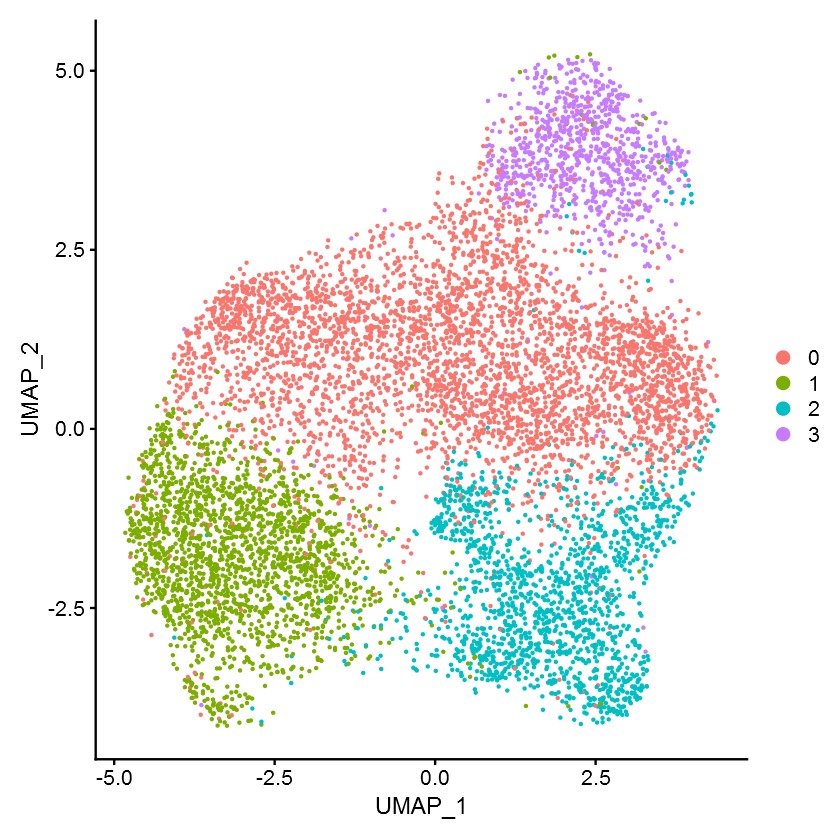

In [5]:
seurat = subset(seurat, cells =colnames(seurat)[seurat$nFeature_RNA > 200])
seurat = FindVariableFeatures(seurat)
seurat = ScaleData(seurat, features = rownames(seurat), vars.to.regress = 'nFeature_RNA')
seurat = RunPCA(seurat, features = VariableFeatures(seurat))
seurat = FindNeighbors(seurat, dims = 1:30)
seurat = FindClusters(seurat, resolution = .2)
seurat = RunUMAP(seurat, dims = 1:30)
DimPlot(seurat)

Regressing out nFeature_RNA

Centering and scaling data matrix

PC_ 1 
Positive:  NFKBIA, FCRL1, IGHM, ZFP36L1, JCHAIN, LTB, FCER2, RPL22L1, TNFAIP3, NFKBID 
	   ITGA4, SELL, TAGAP, PDCD4, SYNE2, ENSMMUG00000047632, CD72, TP53INP1, LYST, RALGPS2 
	   CR2, CR1, ENSMMUG00000056792, ZC3H12A, PIK3CG, PECAM1, NIBAN3, FCMR, GPR155, TXNIP 
Negative:  METRNL, GPR183, ITGAX, ISCA1, RGS16, S100A10, NR4A2, ST3GAL5, ANXA2, SRGN 
	   RGS2, SYNE1, DUSP4, RGS1, SCIMP, NR4A3, FOS, CD86, LITAF, TUBA4A 
	   SLC2A3, AHNAK, GPR153, EGR2, CD1C, NR4A1, VIM, PLXNC1, GLUD1, B2M 
PC_ 2 
Positive:  TYROBP, ENSMMUG00000015202, S100A6, SULF2, CD52, TXNIP, ENSMMUG00000014641, CRIP1, CD1C, FGD2 
	   S100A4, ANXA4, FGL2, KIAA0040, TMSB10, SIGLEC6, CTSZ, ADD3, CCR2, ANXA1 
	   SAMHD1, ATP5F1E, ENSMMUG00000001458, HACD4, ANXA2, ITGB1, ITGB7, CAPG, ENSMMUG00000054865, GNB3 
Negative:  CD83, EGR1, CD69, NR4A1, DUSP2, NR4A3, FOSB, BTG2, EGR2, RGS1 
	   BHLHE40, CCR7, KDM6B, TNFAIP3, NR4A2, FOS, NFKBIA, CDKN1A, PIM3, SNX9

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 6819
Number of edges: 278312

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8615
Number of communities: 4
Elapsed time: 2 seconds


12:26:09 UMAP embedding parameters a = 0.9922 b = 1.112

12:26:09 Read 6819 rows and found 30 numeric columns

12:26:09 Using Annoy for neighbor search, n_neighbors = 30

12:26:09 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

12:26:12 Writing NN index file to temp file C:\Users\dmorgan\AppData\Local\Temp\2\RtmpQjSl0G\file8703cfd5e34

12:26:12 Searching Annoy index using 1 thread, search_k = 3000

12:26:17 Annoy recall = 100%

12:26:17 Commencing smooth kNN distance calibration using 1 thread

12:26:19 Initializing from normalized Laplacian + noise

12:26:19 Commencing optimization for 500 epochs, with 286830 positive edges

12:26:53 Optimization finished



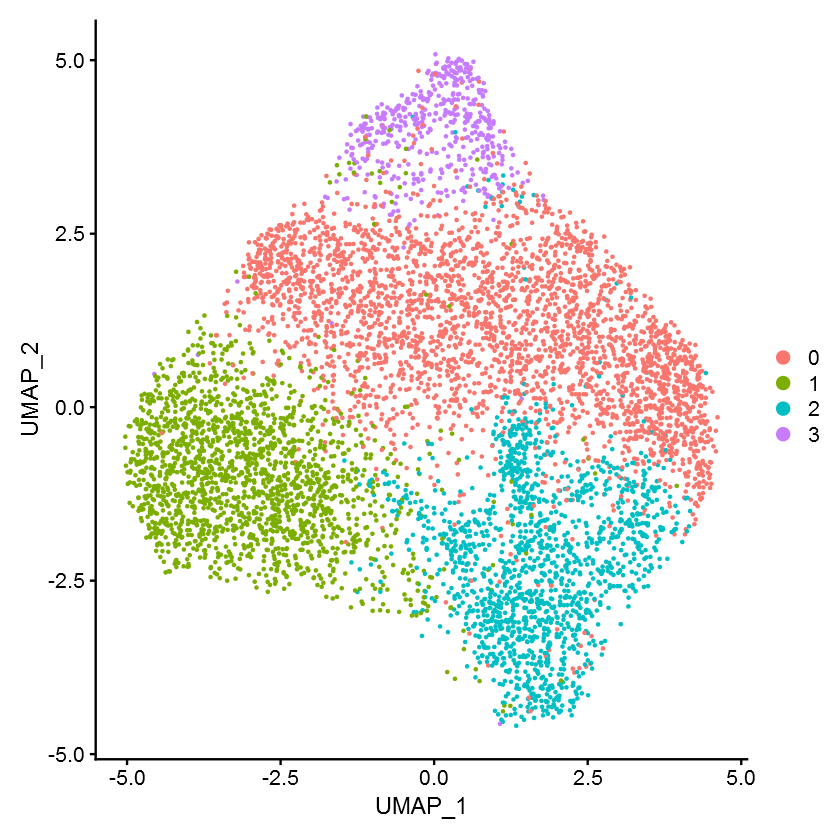

In [8]:

seurat2 = subset(seurat, cells = colnames(seurat)[Idents(seurat) != 3 & seurat$nFeature_RNA > 300])
DefaultAssay(seurat2) = 'RNA'
seurat2 = FindVariableFeatures(seurat2)
seurat2 = ScaleData(seurat2, vars.to.regress = 'nFeature_RNA')
seurat2 = RunPCA(seurat2, features = VariableFeatures(seurat2))
seurat2 = FindNeighbors(seurat2, dims = 1:30)
seurat2 = FindClusters(seurat2, resolution = .2)
seurat2 = RunUMAP(seurat2, dims = 1:30)
DimPlot(seurat2)

In [10]:
saveRDS(seurat2, 'seurat.RDS')